# Importing Dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('tweets.csv')

In [2]:
df.sample(3)

,target,id,date,flag,user,text
55278,1,2066791973,Sun Jun 07 11:10:44 PDT 2009,NO_QUERY,darenBBC,@maggiephilbin u should have seen the beaming ...
88291,0,2260351422,Sat Jun 20 19:04:41 PDT 2009,NO_QUERY,wintermourning,@mallycakes I hate it let me know if you know...
88917,1,2053386769,Sat Jun 06 04:22:15 PDT 2009,NO_QUERY,interception7,@jackandrai nice performance you have done guy...


In [3]:
df['date'] = df['date'].astype('datetime64[ns]')

# making features from "date" column
df['hour'] = df['date'].dt.hour
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['is_weekend'] = np.where(df['dayofweek'].isin([5, 6]), 1, 0)

/home/mridul/.local/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [4]:
# dropping non-sensical column
drop_list = ['id', 'date', 'flag']
df.drop(columns=drop_list, axis=1, inplace=True)

In [5]:
df.columns

Index(['target', 'user', 'text', 'hour', 'month', 'day', 'dayofweek',
       'is_weekend'],
      dtype='object')

# Making new feature

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [7]:
def count_words(text):
    doc = nlp(text)  # Process the text with spaCy
    return len([token for token in doc if not token.is_space])  # Count non-space tokens

def count_sentences(text):
    doc = nlp(text)  # Process the text with spaCy
    return len(list(doc.sents))  # Count sentences

In [8]:
# Process the entire text column at once
docs = list(nlp.pipe(df['text'].fillna('')))  # Fill NaN with an empty string

# Create new columns for word and sentence counts
df['word_count'] = [len([token for token in doc if not token.is_space]) for doc in docs]  # Count words
df['sent_count'] = [len(list(doc.sents)) for doc in docs]  # Count sentences

In [9]:
# Function to categorize hours into time periods
def categorize_time_period(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column
df['time_period'] = df['hour'].apply(categorize_time_period)

# Define the order of the time periods
time_periods = ['Morning', 'Afternoon', 'Evening', 'Night']

# Convert the time_period column to a categorical type with the specified order
df['time_period'] = pd.Categorical(df['time_period'], categories=time_periods, ordered=True)

# Sort the DataFrame by time_period
df = df.sort_values('time_period')

# EDA

## time

/tmp/ipykernel_19450/209070984.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='dayofweek', y='target', estimator=lambda x: sum(x) / len(x), palette='viridis')


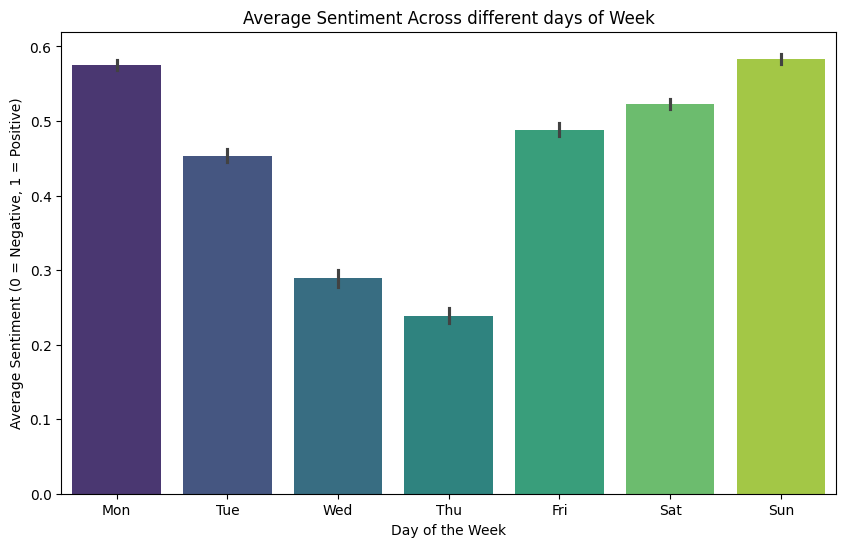

In [13]:
# Day of the Week Sentiment Distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='dayofweek', y='target', estimator=lambda x: sum(x) / len(x), palette='viridis')
plt.title('Average Sentiment Across different days of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sentiment (0 = Negative, 1 = Positive)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

/tmp/ipykernel_19450/3039732680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='month', y='target', estimator=lambda x: sum(x) / len(x), palette='viridis')


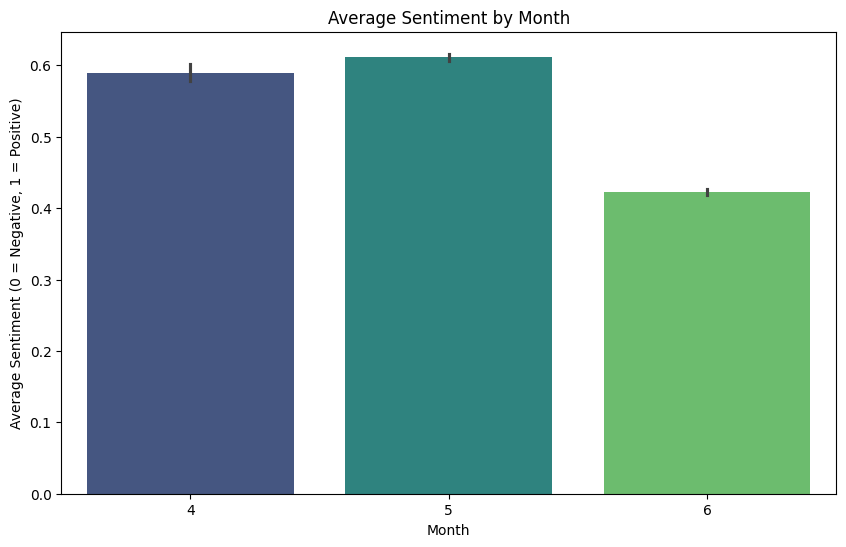

In [14]:
# Month Sentiment Distribution

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='month', y='target', estimator=lambda x: sum(x) / len(x), palette='viridis')
plt.title('Average Sentiment by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment (0 = Negative, 1 = Positive)')
plt.xticks(ticks=range(3), labels=[4, 5, 6])
plt.show()

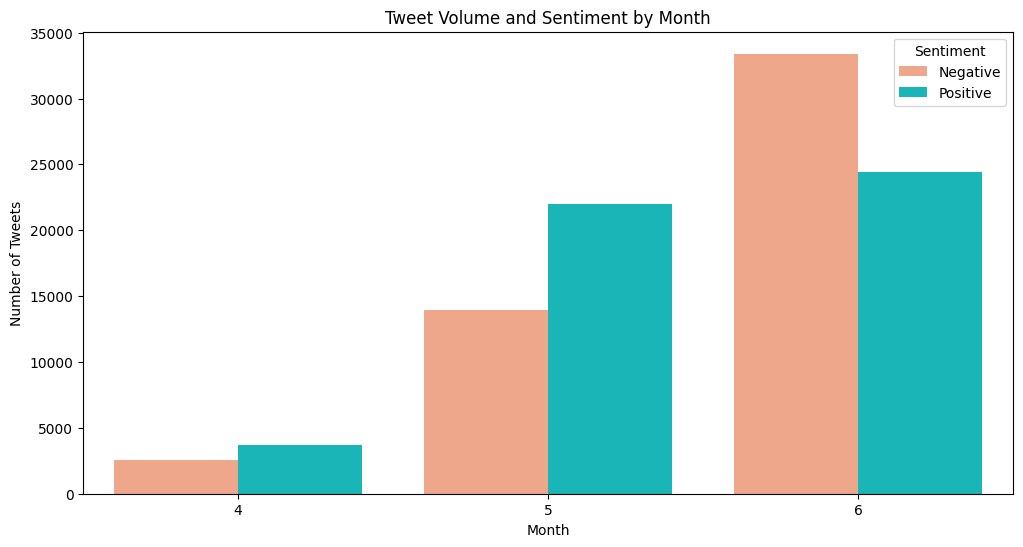

In [15]:
# Monthly Tweet Volume and Sentiment

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='month', hue='target', palette=['#FFA07A', '#00CED1'])
plt.title('Tweet Volume and Sentiment by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.show()

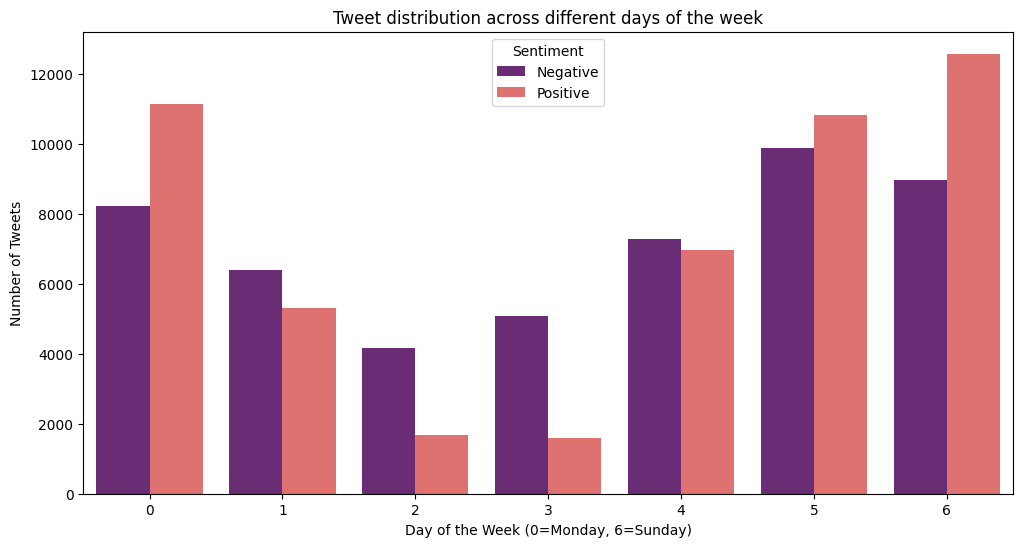

In [16]:
# Count Plot for Tweet distribution across different days of the week

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='dayofweek', hue='target', palette="magma")
plt.title("Tweet distribution across different days of the week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment", labels=["Negative", "Positive"])
plt.show()

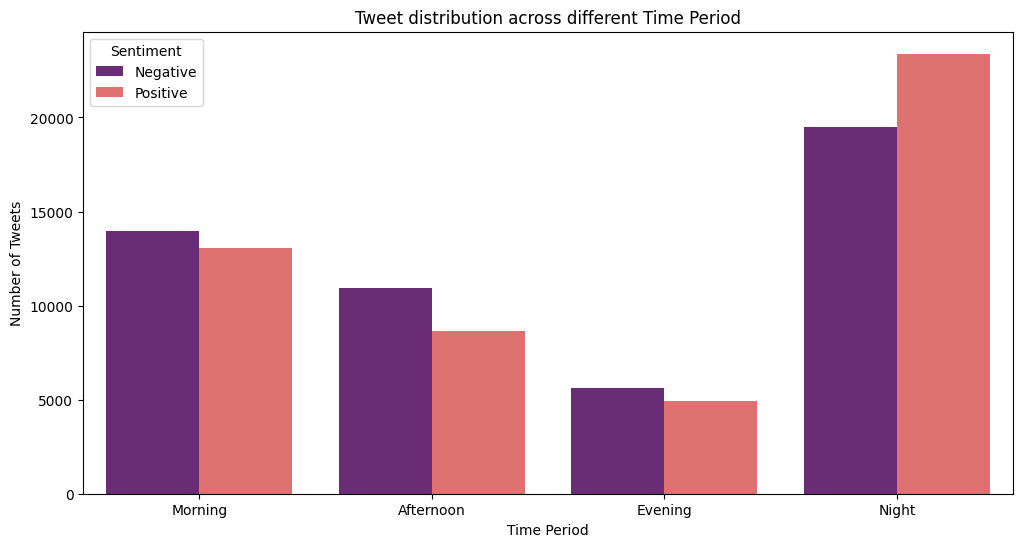

In [17]:
# Count Plot for Tweet distribution across different hours of the day to determine peak activity hour

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='time_period', hue='target', palette="magma")
plt.title("Tweet distribution across different Time Period")
plt.xlabel("Time Period")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment", labels=["Negative", "Positive"])
plt.show()

/tmp/ipykernel_19450/3519900442.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_sentiment, x='time_period', y='target', palette='viridis')


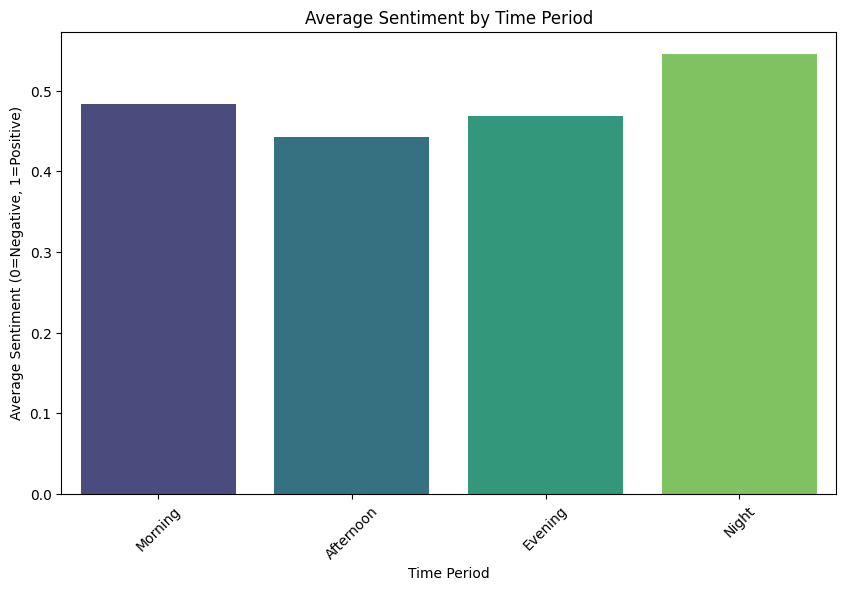

In [18]:
# correlation between sentiment and posting time_period
average_sentiment = df.groupby('time_period')['target'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=average_sentiment, x='time_period', y='target', palette='viridis')
plt.title('Average Sentiment by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Average Sentiment (0=Negative, 1=Positive)')
plt.xticks(rotation=45)
plt.show()

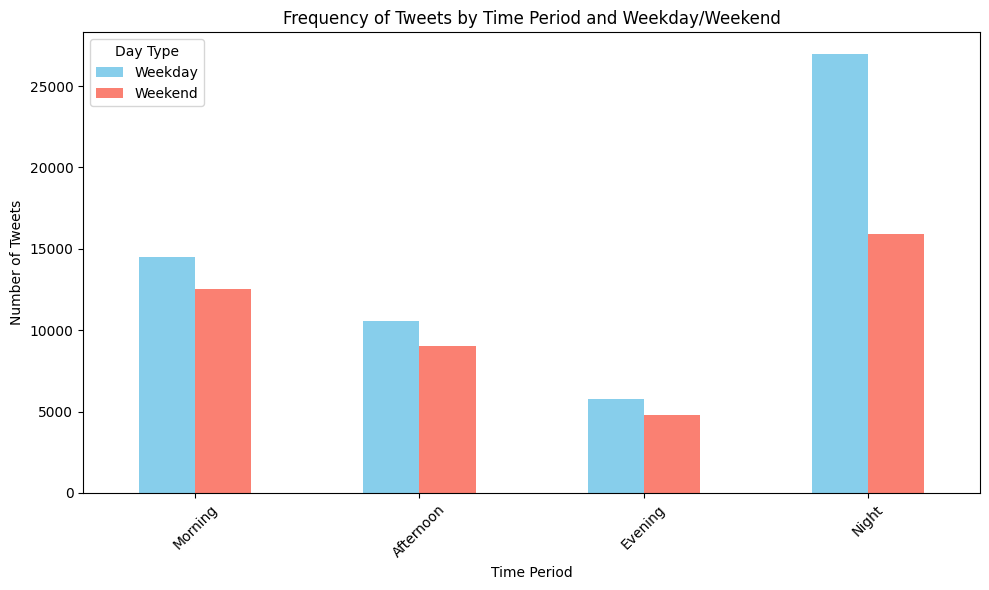

In [19]:
# Count tweets by time period and weekend status
tweet_counts = df.groupby(['time_period', 'is_weekend']).size().reset_index(name='tweet_count')

# Create a pivot table for better visualization
tweet_counts_pivot = tweet_counts.pivot(index='time_period', columns='is_weekend', values='tweet_count').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
tweet_counts_pivot.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], ax=plt.gca())
plt.title('Frequency of Tweets by Time Period and Weekday/Weekend')
plt.xlabel('Time Period')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(['Weekday', 'Weekend'], title='Day Type')
plt.tight_layout()
plt.show()

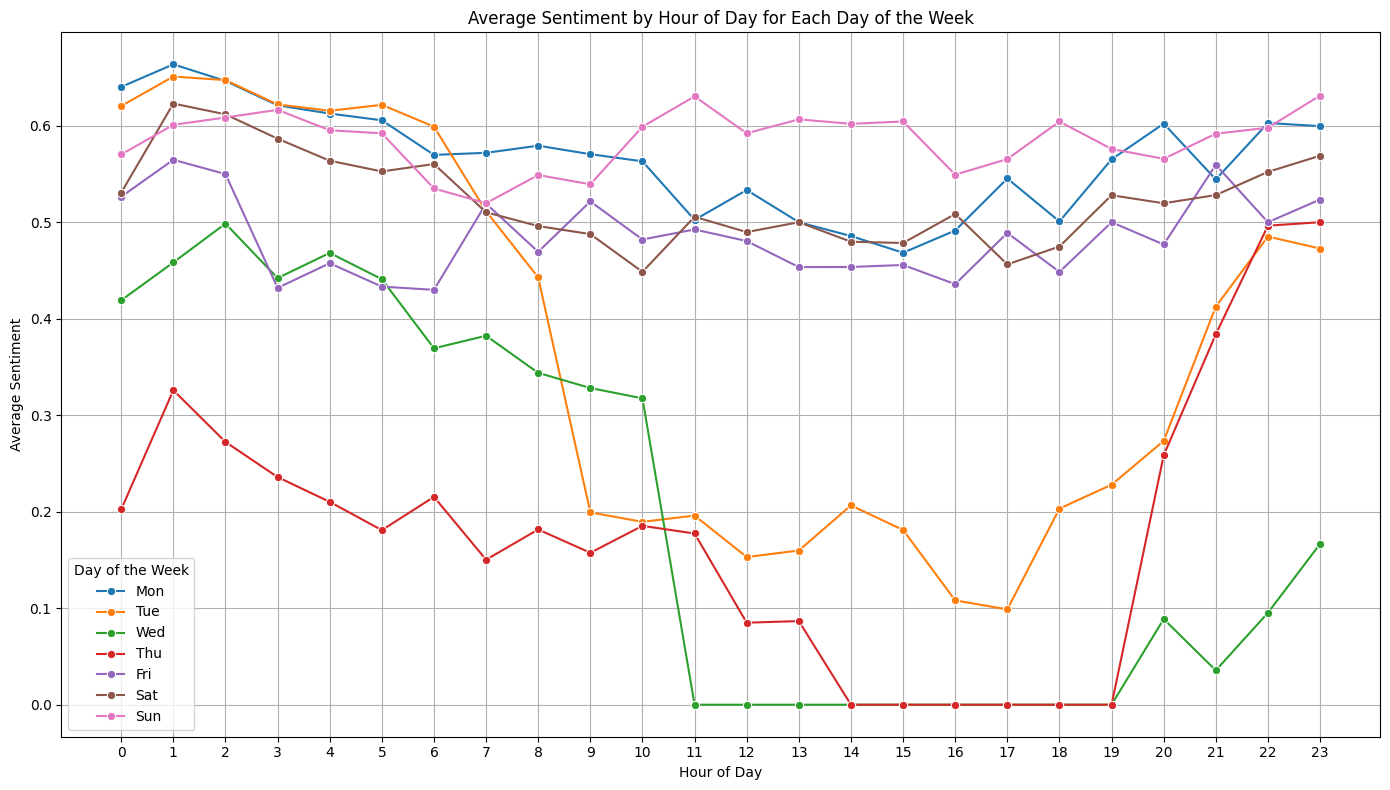

In [20]:
# Calculate average sentiment by day of the week and hour
average_sentiment = df.groupby(['dayofweek', 'hour'])['target'].mean().reset_index()

# Map dayofweek integers to actual names for better readability
average_sentiment['dayofweek'] = average_sentiment['dayofweek'].map({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'})

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=average_sentiment, x='hour', y='target', hue='dayofweek', marker='o', palette='tab10')

# Customize the plot
plt.title('Average Sentiment by Hour of Day for Each Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Average Sentiment')
plt.xticks(range(0, 24))  # Set x-ticks to represent each hour
plt.legend(title='Day of the Week')
plt.grid(True)
plt.tight_layout()
plt.show()

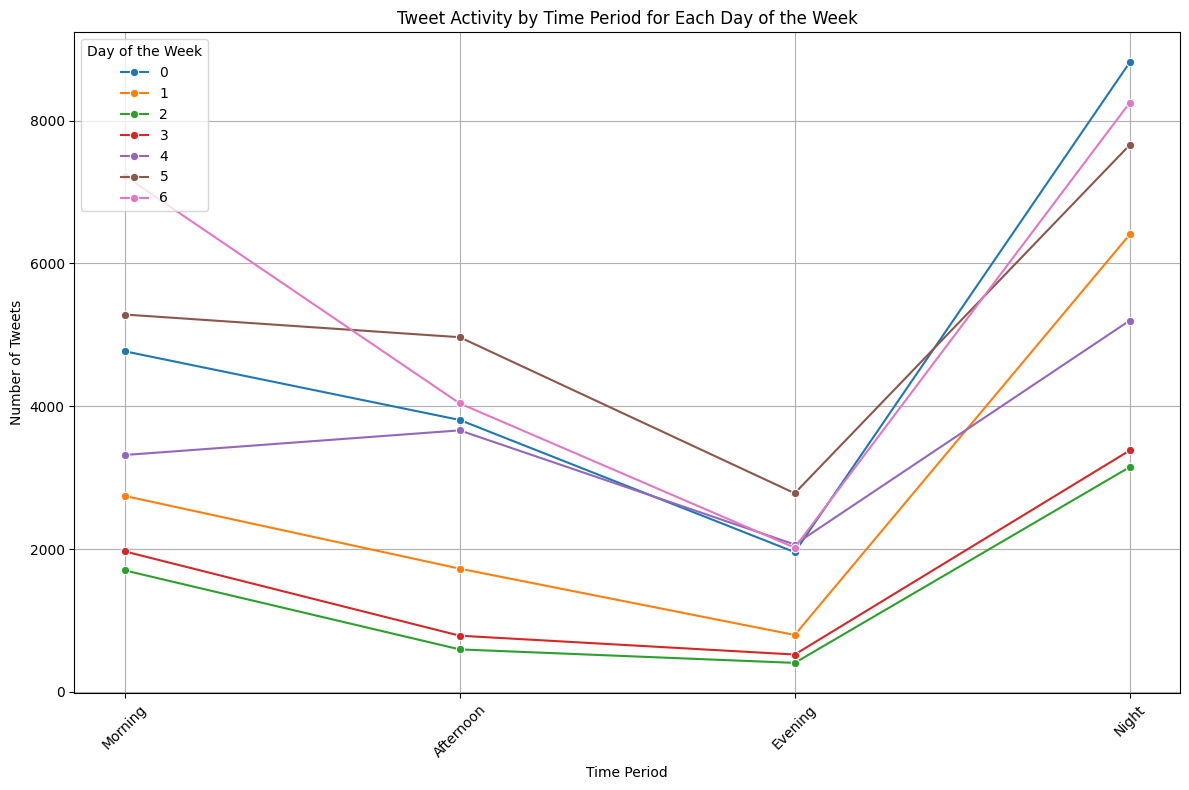

In [21]:
# Create lineplots showing activity patterns across days/hours

# Aggregate data for line plot
lineplot_data = df.groupby(['dayofweek', 'time_period']).size().reset_index(name='count')

# Create line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=lineplot_data, x='time_period', y='count', hue='dayofweek', marker='o', palette='tab10')
plt.title('Tweet Activity by Time Period for Each Day of the Week')
plt.xlabel('Time Period')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## text

In [22]:
# Popular Words in Positive vs. Negative Tweets (Word Clouds)

from wordcloud import WordCloud

# Separate positive and negative tweets
positive_text = " ".join(df[df['target'] == 1]['text'])
negative_text = " ".join(df[df['target'] == 0]['text'])

# Generate word clouds
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=1200, height=1200, background_color='white', colormap='Blues').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=1200, height=1200, background_color='white', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')

plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# average length of Positive Vs Negative tweets
# Ensure 'char_count' column exists, which contains the character length of each tweet
if 'char_count' not in df.columns:
    df['char_count'] = df['text'].apply(len)

plt.figure(figsize=(12, 6))

# Plot side-by-side box plots for character length by sentiment
sns.boxplot(x='target', y='char_count', data=df, palette=['salmon', 'skyblue'])

# Set plot title and labels
plt.title('Comparison of Tweet Character Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Character Length')
plt.xticks([0, 1], ['Negative', 'Positive'])  # Customize x-axis labels

plt.show()

In [ ]:
import re

# Step 1: Extract mentions
# Function to extract mentions from tweet text
def extract_mentions(tweet):
    return re.findall(r'@(\w+)', tweet)

# Apply the function to extract mentions into a new column
df['mentions'] = df['text'].apply(extract_mentions)

# Step 2: Flatten the list of mentions and count occurrences
# Create a Series of mentions
all_mentions = df['mentions'].explode()
mention_counts = all_mentions.value_counts()

# Step 3: Visualize results
# Get the top 10 most mentioned users
top_mentions = mention_counts.head(10)

# Create a bar plot of the top mentioned users
plt.figure(figsize=(10, 6))
sns.barplot(x=top_mentions.values, y=top_mentions.index, palette='viridis')
plt.title('Top 10 Mentioned Users in Tweets')
plt.xlabel('Number of Mentions')
plt.ylabel('User Handle')
plt.show()

In [ ]:
# Create a pie chart for the top mentioned users (just drew the pie-chart for the above code)
plt.figure(figsize=(8, 8))
plt.pie(top_mentions, labels=top_mentions.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Percentage of Mentions for Top 10 Users')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

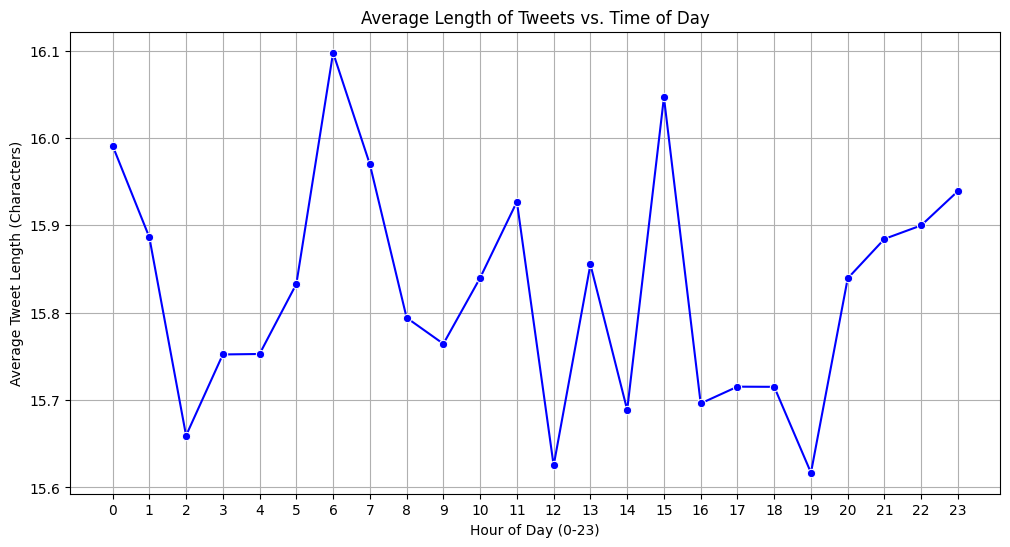

In [23]:
# Step 2: Group by hour and calculate the average tweet length
average_length_by_hour = df.groupby('hour')['word_count'].mean().reset_index()

# Step 3: Visualize the results
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='word_count', data=average_length_by_hour, marker='o', color='blue')
plt.title('Average Length of Tweets vs. Time of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average Tweet Length (Characters)')
plt.xticks(range(0, 24))  # Set x-axis ticks for each hour
plt.grid(True)
plt.show()

## user

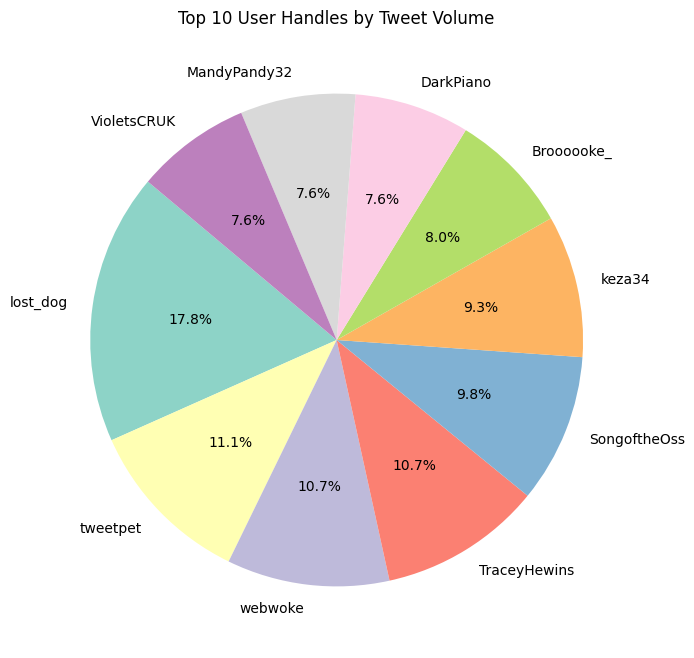

In [24]:
# Pie Chart of determine top 10 most active user

top_10_users = df['user'].value_counts().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(top_10_users, labels=top_10_users.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Top 10 User Handles by Tweet Volume")
plt.show()

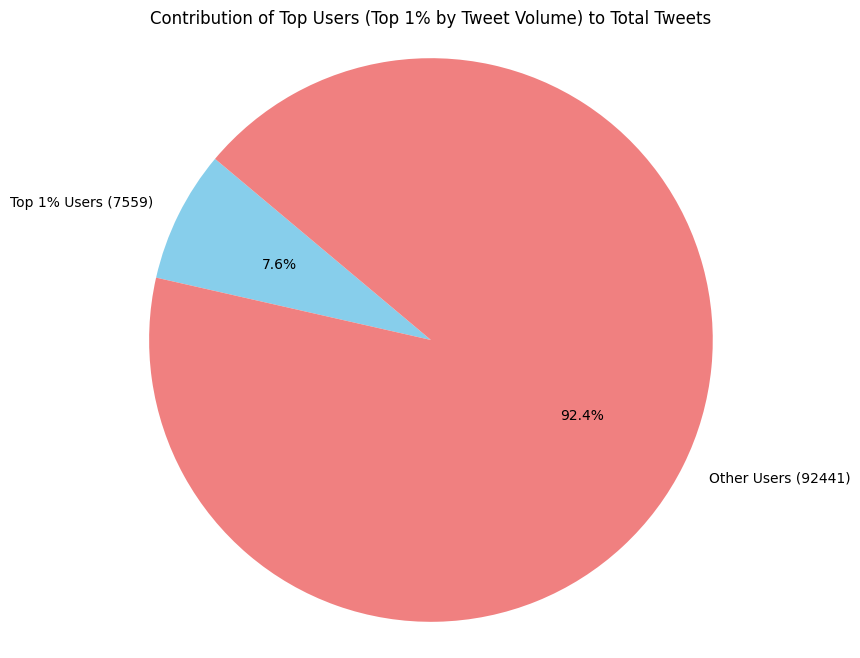

In [25]:
# Count the total number of tweets
total_tweets = df.shape[0]

# Get the tweet counts for each user
user_tweet_counts = df['user'].value_counts()

# Calculate the 99th percentile of tweet counts
quantile_threshold = user_tweet_counts.quantile(0.99)

# Get the users who have tweet counts above the 99th percentile
top_users = user_tweet_counts[user_tweet_counts >= quantile_threshold]

# Calculate the total number of tweets by top users
top_users_count = top_users.sum()

# Calculate the count of tweets from other users
other_users_count = total_tweets - top_users_count

# Create data for pie chart
labels = [f'Top 1% Users ({top_users_count})', f'Other Users ({other_users_count})']
sizes = [top_users_count, other_users_count]
colors = ['skyblue', 'lightcoral']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Contribution of Top Users (Top 1% by Tweet Volume) to Total Tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

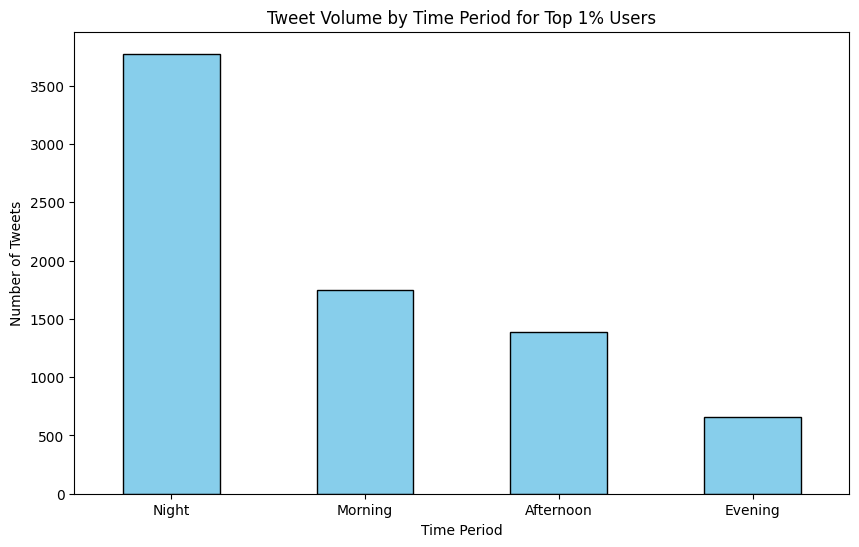

In [26]:
# determining the average tweet pattern for top 1% users

# Step 1: Calculate tweet volume per user
user_counts = df['user'].value_counts()

# Step 2: Find the threshold for top 1% users
top_1_percent_threshold = user_counts.quantile(0.99)

# Step 3: Identify top 1% users
top_1_percent_users = user_counts[user_counts >= top_1_percent_threshold].index

# Step 4: Filter the original DataFrame for tweets from top 1% users
top_users_df = df[df['user'].isin(top_1_percent_users)]

# Step 5: Group by time period and count tweets
time_period_counts = top_users_df['time_period'].value_counts()

# Step 6: Plot the results
plt.figure(figsize=(10, 6))
time_period_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Tweet Volume by Time Period for Top 1% Users")
plt.xlabel("Time Period")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.show()